# Pytorch Basic
## install

In [2]:
# torch는 기본으로 설치 되어 있다.
# !를 통해서 shell script 명령어를 사용할 수 있다.
!pip install torch
!pip install torchvision

## Tensor

In [3]:
import torch
x = torch.zeros(4) # 0으로 채워진 길이가 4인 1차원 Tensor 생성
print("torch.zeros(4) : ", x)

torch.zeros(4) :  tensor([0., 0., 0., 0.])


In [4]:
y = torch.zeros([2,3]) # 0으로 채워진 길이가 2와 3인 2차원 Tensor 생성
print("torch.zeros([2,3]) : \n", y)

torch.zeros([2,3]) : 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [5]:
z = torch.zeros([2,3,1]) # 0으로 채워진 길이가 2와 3,1인 3차원 Tensor 생성
print("torch.zeros([2,3,1]) : \n", z)

torch.zeros([2,3,1]) : 
 tensor([[[0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.]]])


In [6]:
tensor = torch.randn([2,3])
print(f"tensor :\n{tensor}") # 차원 확인
# Attributes of tensor
print(f"Shape of tensor : {tensor.shape}") # 차원 확인
print(f"Datatype of tensor : {tensor.dtype}") # 데이터타입 확인
print(f"Device tensor of stored on : {tensor.device}") # 기기 확인
# Standard numpy-like indexing and slicing
print(f"First row : {tensor[0]}") # indexing을 이용한 데이터 접근
# :은 작성된 차원을 전부 사용, [:,0] => 1차원 전부와 2차원 데이터 중 index가 0인 값.
print(f"First column : {tensor[:,0]}")
# ...은 직접 작성된 차원을 제외한 차원을 원본 그대로 사용
# [..., -1]은 마지막 차원을 제외하고 모든 차원의 데이터 전부와 마지막 차원의 index가 -1(마지막)인 값
print(f"Last column : {tensor[...,-1]}")

tensor[:,1]=0
print(tensor)

tensor :
tensor([[ 1.0137,  0.2215,  1.0852],
        [-0.0507,  1.2595, -1.6198]])
Shape of tensor : torch.Size([2, 3])
Datatype of tensor : torch.float32
Device tensor of stored on : cpu
First row : tensor([1.0137, 0.2215, 1.0852])
First column : tensor([ 1.0137, -0.0507])
Last column : tensor([ 1.0852, -1.6198])
tensor([[ 1.0137,  0.0000,  1.0852],
        [-0.0507,  0.0000, -1.6198]])


In [7]:
import torch.nn as nn
import numpy as np

In [8]:
##### Tensor
##### Directly initializing
tensor_one=torch.tensor([[5,8,6],[8,4,5]], dtype=torch.float64, requires_grad=True)
print(tensor_one)
##### Randomly initializing tensor with shape of [2,3]
tensor_two=torch.randn(tensor_one.shape, dtype=torch.float64, requires_grad=True)
print(tensor_two)

tensor([[5., 8., 6.],
        [8., 4., 5.]], dtype=torch.float64, requires_grad=True)
tensor([[ 0.4452,  1.0368,  0.5283],
        [-0.3313, -0.1057, -0.1822]], dtype=torch.float64, requires_grad=True)


In [9]:
##### Arithmetic operations
y1 = torch.add(tensor_one, tensor_two)
y2 = tensor_one+tensor_two
print(y1)
print(y2)

tensor([[5.4452, 9.0368, 6.5283],
        [7.6687, 3.8943, 4.8178]], dtype=torch.float64, grad_fn=<AddBackward0>)
tensor([[5.4452, 9.0368, 6.5283],
        [7.6687, 3.8943, 4.8178]], dtype=torch.float64, grad_fn=<AddBackward0>)


In [10]:
y1 = torch.mul(tensor_one, tensor_two)
y2 = tensor_one*tensor_two
print(y1)
print(y2)

tensor([[ 2.2258,  8.2946,  3.1700],
        [-2.6505, -0.4230, -0.9108]], dtype=torch.float64,
       grad_fn=<MulBackward0>)
tensor([[ 2.2258,  8.2946,  3.1700],
        [-2.6505, -0.4230, -0.9108]], dtype=torch.float64,
       grad_fn=<MulBackward0>)


In [11]:
y1 = torch.matmul(tensor_one, tensor_two.T)
y2 = tensor_one@tensor_two.T
print(y1)
print(y2)

tensor([[13.6904, -3.5955],
        [10.3502, -3.9843]], dtype=torch.float64, grad_fn=<MmBackward0>)
tensor([[13.6904, -3.5955],
        [10.3502, -3.9843]], dtype=torch.float64, grad_fn=<MmBackward0>)


In [12]:
# requires_grad = True: tensor 연산할 때, gradient를 자동으로 트랙킹함.
# backwordL gradient 계산
x = torch.tensor([5], dtype=torch.float64, requires_grad=True)
y = torch.tensor([2], dtype=torch.float64, requires_grad=True)
z = x*y
z.backward()
print(x.grad)
print(y.grad)

tensor([2.], dtype=torch.float64)
tensor([5.], dtype=torch.float64)


In [13]:
# tensor -> numpy 혹은 numpy -> tensor를 할 경우,
# tensor와 numpy array가 cpu에서 동작할 경우 메모리 공유
tensor = torch.ones(5)
print(f"tensor:{tensor}")
numpy_array = tensor.numpy()
print(f"numpy_array:{numpy_array}")

tensor.add_(3) # in-place add
print(f"tensor:{tensor}")
print(f"numpy_array:{numpy_array}")

tensor = tensor.add(3) # add 후 새로운 객체를 할당
print(f"tensor:{tensor}")
print(f"numpy_array:{numpy_array}")

tensor:tensor([1., 1., 1., 1., 1.])
numpy_array:[1. 1. 1. 1. 1.]
tensor:tensor([4., 4., 4., 4., 4.])
numpy_array:[4. 4. 4. 4. 4.]
tensor:tensor([7., 7., 7., 7., 7.])
numpy_array:[4. 4. 4. 4. 4.]


In [14]:
## torch.view
x1 = torch.randn(4,5)
x2 = x1.view(20)
x3 = x1.view(2,-1) # -1은 자동 할당
x4 = x1.view(2,2,5)
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)

torch.Size([4, 5])
torch.Size([20])
torch.Size([2, 10])
torch.Size([2, 2, 5])


In [15]:
# 4x5는 총 20개의 element를 가지고 있는데 
# 정확하게 나눌 수 없는 값으로 shape을 변경한다면?
# x5 = x1.view(3,-1)
# RuntimeError: shape '[3, -1]' is invalid for input of size 20
# RuntimeError 발생!

In [16]:
# squeeze : 자원 축소
x1 = torch.randn(3,1,1,3)
print(x1, x1.shape)
x2 = x1.squeeze() # 해당 차원의 데이터 길이가 1인 차원들을 삭제시킴.
print(x2, x2.shape)

tensor([[[[ 0.0391, -0.8724,  0.8961]]],


        [[[ 0.9636, -1.0021,  0.7613]]],


        [[[-0.8230, -0.7096, -0.3206]]]]) torch.Size([3, 1, 1, 3])
tensor([[ 0.0391, -0.8724,  0.8961],
        [ 0.9636, -1.0021,  0.7613],
        [-0.8230, -0.7096, -0.3206]]) torch.Size([3, 3])


In [17]:
# unsqueeze : 자원 확대
x1 = torch.randn(3,1,3)
print(x1, x1.shape)
x2 = x1.unsqueeze(dim=0) # dim의 값에 해당하는 차원을 데이터 길이 1로 추가해줌.
print(x2, x2.shape)

tensor([[[-0.6211,  1.1688,  0.4561]],

        [[-1.0033,  0.3040, -1.6314]],

        [[ 0.4042, -0.4986,  1.1786]]]) torch.Size([3, 1, 3])
tensor([[[[-0.6211,  1.1688,  0.4561]],

         [[-1.0033,  0.3040, -1.6314]],

         [[ 0.4042, -0.4986,  1.1786]]]]) torch.Size([1, 3, 1, 3])


In [18]:
# stack: 새로운 차원으로 tensor를 붙임
x1 = torch.randn([1,2,3])
x2 = torch.randn([1,2,3])
print(x1)
print(x2)

x3 = torch.stack([x1,x2]) # default dim = 0
print(x3, x3.shape)

x3 = torch.stack([x1,x2], dim=1)
print(x3, x3.shape)

x3 = torch.stack([x1,x2], dim=2)
print(x3, x3.shape)

x3 = torch.stack([x1,x2], dim=3)
print(x3, x3.shape)

tensor([[[ 0.0271,  0.4221,  1.1858],
         [ 0.5947, -0.2850,  0.2684]]])
tensor([[[-0.8598, -1.0454,  0.5261],
         [ 0.1927, -1.9400,  0.0603]]])
tensor([[[[ 0.0271,  0.4221,  1.1858],
          [ 0.5947, -0.2850,  0.2684]]],


        [[[-0.8598, -1.0454,  0.5261],
          [ 0.1927, -1.9400,  0.0603]]]]) torch.Size([2, 1, 2, 3])
tensor([[[[ 0.0271,  0.4221,  1.1858],
          [ 0.5947, -0.2850,  0.2684]],

         [[-0.8598, -1.0454,  0.5261],
          [ 0.1927, -1.9400,  0.0603]]]]) torch.Size([1, 2, 2, 3])
tensor([[[[ 0.0271,  0.4221,  1.1858],
          [-0.8598, -1.0454,  0.5261]],

         [[ 0.5947, -0.2850,  0.2684],
          [ 0.1927, -1.9400,  0.0603]]]]) torch.Size([1, 2, 2, 3])
tensor([[[[ 0.0271, -0.8598],
          [ 0.4221, -1.0454],
          [ 1.1858,  0.5261]],

         [[ 0.5947,  0.1927],
          [-0.2850, -1.9400],
          [ 0.2684,  0.0603]]]]) torch.Size([1, 2, 3, 2])


In [19]:
# cat : 주어진 차원에서 tensor를 붙임
x3 = torch.cat([x1, x2])  # default dim = 0
print(x3, x3.shape)

x3 = torch.cat([x1, x2], dim=1)
print(x3, x3.shape)

x3 = torch.cat([x1, x2], dim=2)
print(x3, x3.shape)

tensor([[[ 0.0271,  0.4221,  1.1858],
         [ 0.5947, -0.2850,  0.2684]],

        [[-0.8598, -1.0454,  0.5261],
         [ 0.1927, -1.9400,  0.0603]]]) torch.Size([2, 2, 3])
tensor([[[ 0.0271,  0.4221,  1.1858],
         [ 0.5947, -0.2850,  0.2684],
         [-0.8598, -1.0454,  0.5261],
         [ 0.1927, -1.9400,  0.0603]]]) torch.Size([1, 4, 3])
tensor([[[ 0.0271,  0.4221,  1.1858, -0.8598, -1.0454,  0.5261],
         [ 0.5947, -0.2850,  0.2684,  0.1927, -1.9400,  0.0603]]]) torch.Size([1, 2, 6])


In [20]:
# chunk: 주어진 차원기준 tensor를 n개의 그룹으로 나눔(n등분 50 / n=10 -> 5)
x1 = torch.stack([torch.ones(6), torch.zeros(6)])
print(x1, x1.shape)
x2, x3 = torch.chunk(x1,2,dim=0)
print(x2, x2.shape)
x2, x3 = torch.chunk(x1,2,dim=1)
print(x2, x2.shape)

tensor([[1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.]]) torch.Size([2, 6])
tensor([[1., 1., 1., 1., 1., 1.]]) torch.Size([1, 6])
tensor([[1., 1., 1.],
        [0., 0., 0.]]) torch.Size([2, 3])


In [21]:
# split: 주어진 차원기준 tensor를 n개씩 구성된 그룹으로 나눔(n개 그룹 50 / 10 -> n=5)
x2, x3 = torch.split(x1,1,dim=0)
print(x2, x2.shape)
x2, x3, x4 = torch.split(x1,2,dim=1)
print(x2, x2.shape)

tensor([[1., 1., 1., 1., 1., 1.]]) torch.Size([1, 6])
tensor([[1., 1.],
        [0., 0.]]) torch.Size([2, 2])


In [24]:
# tensor를 gpu로 이동
x1 = torch.randn(2,3)
print(x1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

x1 = x1.to(device)
x2 = torch.randn(2,3, device=device)
x3 = torch.randn(2,3)
print(x1+x2)
print(x2+x3) # tensor가 같은 위치에 있지 않아서 에러 발생(x2 위치 : gpu(cuda), x3 위치 : cpu)
# RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

tensor([[ 0.2124, -0.3684,  0.0947],
        [-0.5132,  0.6207,  0.5512]])
cuda
tensor([[-0.3171, -2.1175,  0.2624],
        [-0.5869,  1.6251, -1.1863]], device='cuda:0')


RuntimeError: ignored

In [25]:
# Dataset
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.datasets import fetch_openml

In [46]:
## dataset load
mnist = fetch_openml('mnist_784')

# x_data = mnist.data.astype('float32')
x_data = mnist.data
y_data = mnist.target.astype(int)

In [47]:
from sklearn.model_selection import train_test_split

device = "cpu"
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
X_train, X_test = torch.tensor(X_train.values, dtype='float32'), torch.tensor(X_test.values, dtype='float32')
y_train, y_test = torch.tensor(y_train.values), torch.tensor(y_test.values)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([56000, 784])
torch.Size([14000, 784])
torch.Size([56000])
torch.Size([14000])


In [53]:
# LogisticRegression Model
class LogisticRegression(torch.nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegression, self).__init__()
    self.linear = torch.nn.Linear(input_dim, output_dim)
  def forward(self, x):
    outputs = torch.sigmoid(self.linear(x))
    return outputs

In [54]:
import torch.nn as nn
m = nn.Linear(20,30)
input = torch.randn(128,20)
output = m(input)
print(output.shape)
print(m.weight.shape)

torch.Size([128, 30])
torch.Size([30, 20])


In [55]:
# Hypter parameters
epochs = 1000
input_dim = 784
output_dim = 10
lr = 0.01
model = LogisticRegression(input_dim, output_dim)
model = model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [56]:
loss_save_arr=[]
for i in range(epochs):
  # Train
  model.train()
  optimizer.zero_grad()
  output = model(X_train)
  loss = criterion(output, y_train.long())

  loss.backward()
  optimizer.step()
  loss_save_arr.append(loss.data)

  if (i%100 == 0):
    print("=====")
    print("epoch ", i)
    print("loss ", loss.data)
    _, pred = torch.max(output.data, axis=1)
    print("train_accuracy : {:0.3f}".format(float((pred==y_train).sum())/y_train.size(0)))
    model.eval()
    with torch.no_grad():
      output = model(X_test)
      _, pred = torch.max(output.data, axis=1)
      print("train_accuracy : {:0.3f}".format(float((pred==y_test).sum())/y_test.size(0)))

=====
epoch  0
loss  tensor(2.4483)
train_accuracy : 0.141
train_accuracy : 0.183
=====
epoch  100
loss  tensor(1.6572)
train_accuracy : 0.781
train_accuracy : 0.786
=====
epoch  200
loss  tensor(1.6028)
train_accuracy : 0.845
train_accuracy : 0.848
=====
epoch  300
loss  tensor(1.5883)
train_accuracy : 0.861
train_accuracy : 0.863
=====
epoch  400
loss  tensor(1.5805)
train_accuracy : 0.869
train_accuracy : 0.870
=====
epoch  500
loss  tensor(1.5754)
train_accuracy : 0.875
train_accuracy : 0.876
=====
epoch  600
loss  tensor(1.5712)
train_accuracy : 0.880
train_accuracy : 0.879
=====
epoch  700
loss  tensor(1.5681)
train_accuracy : 0.883
train_accuracy : 0.881
=====
epoch  800
loss  tensor(1.5652)
train_accuracy : 0.886
train_accuracy : 0.883
=====
epoch  900
loss  tensor(1.5631)
train_accuracy : 0.888
train_accuracy : 0.885


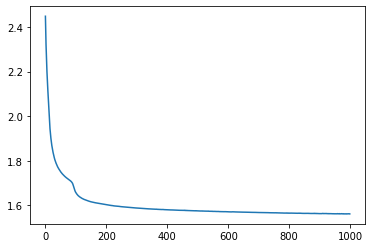

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), [e.to("cpu") for e in loss_save_arr])